<a href="https://colab.research.google.com/github/ParishaKB/SM/blob/master/Facial_Expression_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align=center> Facial Expression Recognition</h2>

### Task 1: Import Libraries

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Tensorflow version: 2.3.0


In [ ]:
from PIL import Image
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


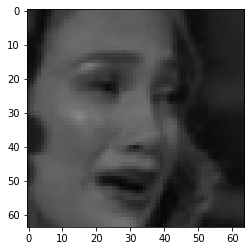

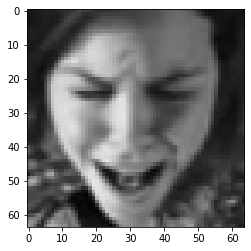

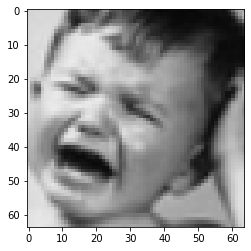

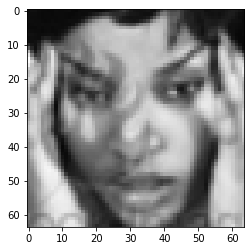

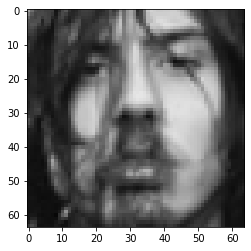

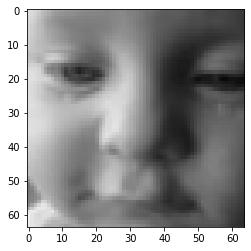

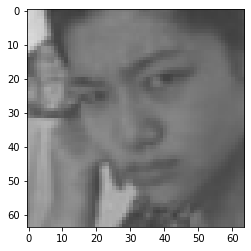

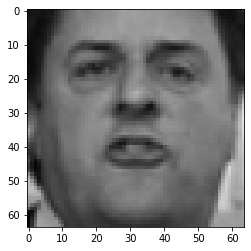

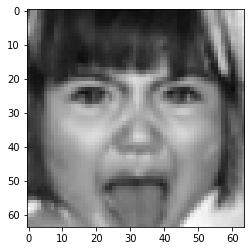

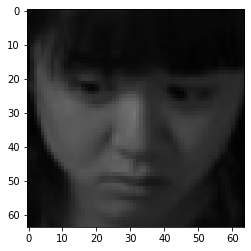

(1070, 4096)
(1070, 4096)


In [ ]:
import pandas as pd
#/content/gdrive/My Drive/expression/train
#/content/gdrive/My Drive/expression/test
import cv2
from google.colab.patches import cv2_imshow
xtrainsad = pd.DataFrame()
ytrainsad = pd.DataFrame()
i = 0
source = "/content/gdrive/My Drive/expression/train/sad"
os.chdir(source)
for root, dirs, files in os.walk(source):
    for file_name in files:
      img = Image.open(os.path.join(root, file_name)).convert('L')
      r = np.array(img)
      rav_resized = cv2.resize(r, (64,64), interpolation=cv2.INTER_LINEAR)
      if i <10:
        plt.imshow(cv2.cvtColor(rav_resized, cv2.COLOR_BGR2RGB))
        plt.show()
      filename1d = rav_resized.reshape(-1)
      xtrainsad["ImgSad"+ str(i)] = filename1d
      ytrainsad["ImgSad"+ str(i)] = (0,1)
      i = i+1
      
   
ytrainsad = ytrainsad.T
xtrainsad = xtrainsad.T
#print(xtrainsad.head())
print(xtrainsad.shape)

xtrainsmile = pd.DataFrame()
ytrainsmile = pd.DataFrame()
i = 0
source = "/content/gdrive/My Drive/expression/train/smile"
os.chdir(source)
for root, dirs, files in os.walk(source):
    for file_name in files:
      img = Image.open(os.path.join(root, file_name)).convert('L')
      r = np.array(img)
      rav_resized = cv2.resize(r, (64,64), interpolation=cv2.INTER_LINEAR)
      #plt.imshow(cv2.cvtColor(rav_resized, cv2.COLOR_BGR2RGB))
      #plt.show()
      filename1d = rav_resized.reshape(-1)
      xtrainsmile["ImgHappy"+ str(i)] = filename1d
      ytrainsmile["ImgHappy"+ str(i)] = (1,0)
      i = i+1
   
 
xtrainsmile = xtrainsmile.T
ytrainsmile = ytrainsmile.T
#print(xtrainsmile.head())
print(xtrainsmile.shape)



In [ ]:
frames = [xtrainsad,xtrainsmile]
train= pd.concat(frames)
print(train.head())
print(train.tail())
print(train.shape)

         0     1     2     3     4     5     ...  4090  4091  4092  4093  4094  4095
ImgSad0    43    37    28    19    12    10  ...    17    17    18    19    21    23
ImgSad1    26    23    23    29    33    35  ...    49    55    57    39    29    32
ImgSad2   210   213   214   213   215   215  ...   146   157   142   175   203   216
ImgSad3    12    16    16    12    10    10  ...   204   208   217   184   177   201
ImgSad4   155   110    77    69    72    65  ...    17    16    17    16    16    16

[5 rows x 4096 columns]
              0     1     2     3     4     ...  4091  4092  4093  4094  4095
ImgHappy1065   132   133   135   137   137  ...   192   183   178   167   154
ImgHappy1066   133   125   124   122   122  ...    18    18    17    18    19
ImgHappy1067   107   106   103   101   101  ...   101   106   103   104   104
ImgHappy1068    14    14    14    14    14  ...    14    14    14    14    14
ImgHappy1069    86    86    86    84    84  ...     2    20     2     9    

In [ ]:
frames = [ytrainsad,ytrainsmile]
ytrain = pd.concat(frames)
ytrain = ytrain.drop([0], axis=1)

print(ytrain.head())
print(ytrain.tail())
print(ytrain.shape)

         1
ImgSad0  1
ImgSad1  1
ImgSad2  1
ImgSad3  1
ImgSad4  1
              1
ImgHappy1065  0
ImgHappy1066  0
ImgHappy1067  0
ImgHappy1068  0
ImgHappy1069  0
(2140, 1)


In [ ]:
xtestsad = pd.DataFrame()
ytestsad = pd.DataFrame()
i = 0
source = "/content/gdrive/My Drive/expression/test/sad"
os.chdir(source)
for root, dirs, files in os.walk(source):
    for file_name in files:
      img = Image.open(os.path.join(root, file_name)).convert('L')
      r = np.array(img)
      rav_resized = cv2.resize(r, (64,64), interpolation=cv2.INTER_LINEAR)
      #plt.imshow(cv2.cvtColor(rav_resized, cv2.COLOR_BGR2RGB))
      #plt.show()
      filename1d = rav_resized.reshape(-1)
      xtestsad["ImgSad"+ str(i)] = filename1d
      ytestsad["ImgSad"+ str(i)] = (0,1)
      i = i+1
      
   
ytestsad = ytestsad.T
xtestsad = xtestsad.T
#print(xtestsad.head())
print(xtestsad.shape)

xtestsmile = pd.DataFrame()
ytestsmile = pd.DataFrame()
i = 0
source = "/content/gdrive/My Drive/expression/test/smile"
os.chdir(source)
for root, dirs, files in os.walk(source):
    for file_name in files:
      img = Image.open(os.path.join(root, file_name)).convert('L')
      r = np.array(img)
      rav_resized = cv2.resize(r, (64,64), interpolation=cv2.INTER_LINEAR)
      #plt.imshow(cv2.cvtColor(rav_resized, cv2.COLOR_BGR2RGB))
      #plt.show()
      filename1d = rav_resized.reshape(-1)
      xtestsmile["ImgHappy"+ str(i)] = filename1d
      ytestsmile["ImgHappy"+ str(i)] = (1,0)
      i = i+1
   
 
xtestsmile = xtestsmile.T
ytestsmile = ytestsmile.T
#print(xtestsmile.head())
print(xtestsmile.shape)



(110, 4096)
(110, 4096)


In [ ]:
frames = [xtestsad,xtestsmile]
test = pd.concat(frames)
print(test.head())
print(test.tail())
print(test.shape)

         0     1     2     3     4     5     ...  4090  4091  4092  4093  4094  4095
ImgSad0    56    60    64    68    71    75  ...    16    15    14    28    43    47
ImgSad1   186   186   186   186   187   187  ...   171   171   170   170   168   167
ImgSad2   255   255   255   255   255   255  ...    25    38   108   131   217    75
ImgSad3   255   255   255   255   255   255  ...   255   255   255   255   255   255
ImgSad4   167   167   167   166   166   165  ...   139   174   185   186   186   187

[5 rows x 4096 columns]
             0     1     2     3     4     ...  4091  4092  4093  4094  4095
ImgHappy105    95    65    31    19   112  ...   254   254   253   252   253
ImgHappy106   148   141   136   138   155  ...    79   150   157   154   152
ImgHappy107   192   193   193   193   191  ...   201   191   169   161   169
ImgHappy108   240   242   243   243   241  ...   156   161   177   186   185
ImgHappy109   253   253   253   253   251  ...     7    11    16    22    30

[5

In [ ]:
frames = [ytestsad,ytestsmile]
ytest = pd.concat(frames)
ytest = ytest.drop([0], axis=1)

print(ytest.head())
print(ytest.tail())
print(ytest.shape)

         1
ImgSad0  1
ImgSad1  1
ImgSad2  1
ImgSad3  1
ImgSad4  1
             1
ImgHappy105  0
ImgHappy106  0
ImgHappy107  0
ImgHappy108  0
ImgHappy109  0
(220, 1)


### Task 2 : PCA

In [ ]:
train = train/255.

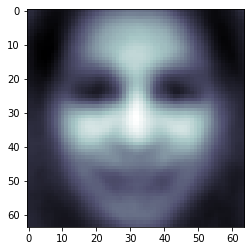

In [ ]:
from sklearn.decomposition import PCA
pca1 = PCA(1000)
pca1.fit(train)
plt.imshow(pca1.mean_.reshape(64,64),cmap=plt.cm.bone)

In [ ]:
print(pca1.components_.shape)

(1000, 4096)


In [ ]:
#pca1.components_

In [ ]:
eigen_values = pca1.explained_variance_
#print(pca1.explained_variance_)

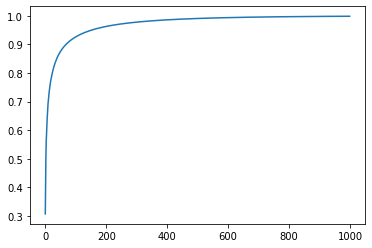

In [ ]:
import numpy as np
plt.plot(np.cumsum(pca1.explained_variance_ratio_))

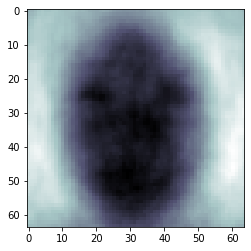

In [ ]:
plt.imshow(pca1.components_[0].reshape(64,64),cmap=plt.cm.bone)

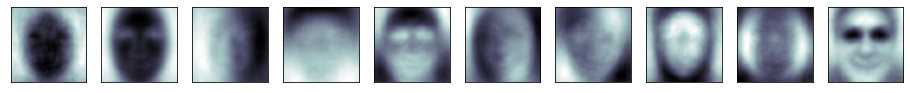

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(10):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca1.components_[i].reshape(64,64),cmap=plt.cm.bone)
#eigen face

In [ ]:
projectedtrain = pca1.fit_transform(train)  ##omega
print(projectedtrain.shape)

(2140, 1000)


In [ ]:
projectedtest = pca1.transform(test)  ##omega
print(projectedtest.shape)

(220, 1000)


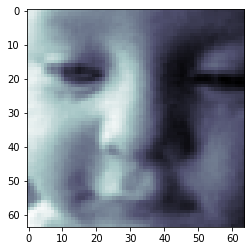

In [ ]:
#projected face
inv_proj3 = pca1.inverse_transform(projectedtrain)
plt.imshow(inv_proj3[5].reshape(64,64),cmap=plt.cm.bone)

### Task 3: Generate Training and Validation Batches

In [ ]:
x_train = projectedtrain
x_test = projectedtest
y_train = ytrain
y_test = ytest
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2140, 1000)
(2140, 1)
(220, 1000)
(220, 1)




### Task 4: Create NN Model

In [ ]:
from keras import models
from keras import layers

In [ ]:
nn=models.Sequential()

In [ ]:
nn.add(layers.Dense(1024,activation = "relu",input_shape=(1000,))) 
nn.add(layers.Dense(512,activation='relu'))
nn.add(layers.Dense(256,activation='relu'))
nn.add(layers.Dense(128,activation='relu'))
nn.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              1025024   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 1,714,177
Trainable params: 1,714,177
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
nn.fit(x_train,y_train,epochs=100,batch_size=10,validation_data = (x_test,y_test))

Epoch 1/100
214/214 [==============================] - 1s 3ms/step - loss: 0.6791 - accuracy: 0.5897 - val_loss: 59.0316 - val_accuracy: 0.6500
Epoch 2/100
214/214 [==============================] - 1s 2ms/step - loss: 0.4930 - accuracy: 0.7748 - val_loss: 149.3918 - val_accuracy: 0.5500
Epoch 3/100
214/214 [==============================] - 1s 2ms/step - loss: 0.3032 - accuracy: 0.8818 - val_loss: 121.6840 - val_accuracy: 0.6591
Epoch 4/100
214/214 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9458 - val_loss: 665.2936 - val_accuracy: 0.5545
Epoch 5/100
214/214 [==============================] - 1s 2ms/step - loss: 0.1071 - accuracy: 0.9678 - val_loss: 863.8476 - val_accuracy: 0.6045
Epoch 6/100
214/214 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.9729 - val_loss: 1438.4047 - val_accuracy: 0.5864
Epoch 7/100
214/214 [==============================] - 1s 2ms/step - loss: 0.0629 - accuracy: 0.9799 - val_loss: 2368.1206 - val_a

In [ ]:
#step 6 evaluate test loss and test accuracy 
test_loss,test_accuracy = nn.evaluate(x_train,y_train)

67/67 [==============================] - 0s 2ms/step - loss: 6.9290e-13 - accuracy: 1.0000


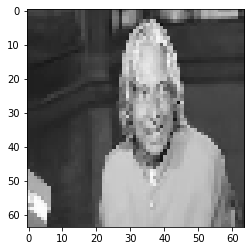

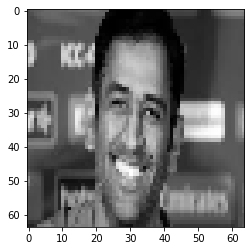

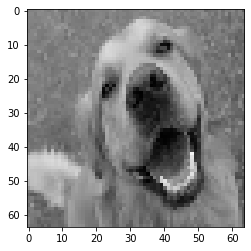

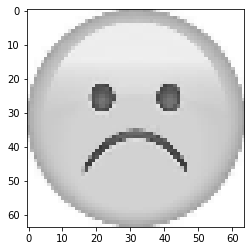

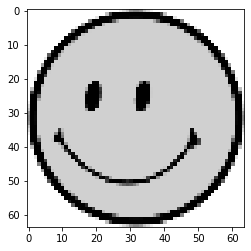

In [ ]:
from PIL import Image
import numpy as np

apj = Image.open("/content/apj.jpg").convert('L')
apj_array = np.array(apj)
dhoni = Image.open("/content/dhoni.jpg").convert('L')
dhoni_array = np.array(dhoni)
dog = Image.open("/content/doggie.jpg").convert('L')
dog_array = np.array(dog)
sad = Image.open("/content/sad.jpg").convert('L')
sad_array = np.array(sad)
smiley = Image.open("/content/smiley.png").convert('L')
smiley_array = np.array(smiley)


import cv2
import matplotlib.pyplot as plt

apj_resized = cv2.resize(apj_array, (64,64), interpolation=cv2.INTER_LINEAR)
dhoni_resized = cv2.resize(dhoni_array, (64,64), interpolation=cv2.INTER_LINEAR)
dog_resized = cv2.resize(dog_array,(64,64),interpolation = cv2.INTER_LINEAR)
sad_resized = cv2.resize(sad_array, (64,64), interpolation=cv2.INTER_LINEAR)
smiley_resized = cv2.resize(smiley_array,(64,64),interpolation = cv2.INTER_LINEAR)



plt.imshow(cv2.cvtColor(apj_resized, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(dhoni_resized, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(dog_resized, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(sad_resized, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(smiley_resized, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
filename1d = apj_resized.reshape(-1)
filename3d = dhoni_resized.reshape(-1)
filename4d = dog_resized.reshape(-1)
filename6d = sad_resized.reshape(-1)
filename7d = smiley_resized.reshape(-1)

realtest = pd.DataFrame()
realtest["Img1"] = filename1d
realtest["Img2"] = filename3d
realtest["Img3"] = filename4d
realtest["Img4"] = filename6d
realtest["Img5"] = filename7d

realtest = realtest.T
realtest

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4056,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
Img1,70,70,70,70,70,65,59,60,72,70,65,65,64,58,74,63,76,55,49,51,52,54,52,53,42,107,90,29,108,131,145,135,84,71,39,43,57,53,62,112,...,189,190,189,192,194,194,193,189,187,189,191,185,184,180,182,188,194,195,193,190,189,186,175,177,185,187,188,183,175,158,99,133,140,108,109,107,143,75,65,52
Img2,79,89,94,96,100,106,106,106,106,107,106,104,109,107,108,111,112,111,111,114,112,104,100,98,4,3,0,0,0,0,0,1,2,5,5,3,3,3,3,1,...,92,78,57,29,25,17,15,38,33,37,37,63,79,64,77,74,6,15,78,54,54,53,54,54,54,54,55,55,55,55,55,56,58,58,57,60,50,57,76,88
Img3,128,130,132,136,140,130,125,131,149,122,119,116,136,123,145,119,132,125,128,129,134,132,130,130,136,144,126,132,123,123,128,131,132,139,133,128,141,128,129,131,...,120,99,103,125,119,93,92,118,126,106,118,112,126,88,78,87,93,124,99,121,124,108,105,117,112,128,106,115,105,117,131,137,139,134,133,125,131,148,136,100
Img4,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254,254,250,250,253,254,250,235,202,168,164,162,170,168,168,168,159,162,170,201,233,250,...,251,236,203,163,164,166,170,171,170,170,165,164,170,205,232,248,252,254,251,253,253,253,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
Img5,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,238,215,193,146,133,133,146,193,215,240,255,255,255,...,255,255,255,240,215,193,149,133,133,149,193,215,240,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255


In [ ]:
realtestpca = pca1.transform(realtest)
realtestpca.shape

(5, 1000)

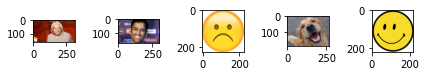

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



apj = Image.open("/content/apj.jpg")
dhoni = Image.open("/content/dhoni.jpg")
dog = Image.open("/content/doggie.jpg")
sad = Image.open("/content/sad.jpg")
smiley = Image.open("/content/smiley.png")


plt.subplot(1, 5, 1 ), plt.imshow(apj, 'gray')
plt.subplot(1, 5, 2), plt.imshow(dhoni, 'gray')
plt.subplot(1, 5, 3), plt.imshow(sad, 'gray')
plt.subplot(1, 5, 4), plt.imshow(dog, 'gray')
plt.subplot(1, 5, 5), plt.imshow(smiley, 'gray')
plt.tight_layout() 
plt.show()

In [ ]:
predictions = nn.predict(realtestpca)
print(predictions.T)

[[0. 0. 1. 0. 0.]]


0 stands for smiling face

1 stands for sad face